In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv('adult.csv')

In [5]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [6]:
print('Rows: {} Columns: {}'.format(dataset.shape[0], dataset.shape[1]))

Rows: 8890 Columns: 15


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8890 entries, 0 to 8889
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8890 non-null   int64  
 1   workclass       8890 non-null   object 
 2   fnlwgt          8890 non-null   int64  
 3   education       8890 non-null   object 
 4   education-num   8890 non-null   int64  
 5   marital-status  8890 non-null   object 
 6   occupation      8890 non-null   object 
 7   relationship    8890 non-null   object 
 8   race            8890 non-null   object 
 9   sex             8890 non-null   object 
 10  capital-gain    8889 non-null   float64
 11  capital-loss    8889 non-null   float64
 12  hours-per-week  8889 non-null   float64
 13  country         8889 non-null   object 
 14  salary          8889 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 1.0+ MB


In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,8890.0,38.432621,13.563475,17.0,28.0,37.0,47.0,90.0
fnlwgt,8890.0,190304.275478,106219.765119,19302.0,117869.0,178576.0,238467.0,1226583.0
education-num,8890.0,10.074016,2.546525,1.0,9.0,10.0,12.0,16.0
capital-gain,8889.0,1077.068399,7370.397238,0.0,0.0,0.0,0.0,99999.0
capital-loss,8889.0,89.058162,402.339076,0.0,0.0,0.0,0.0,3004.0
hours-per-week,8889.0,40.540218,12.333672,1.0,40.0,40.0,45.0,99.0


In [9]:
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass          0.0 %
fnlwgt             0.0 %
education          0.0 %
education-num      0.0 %
marital-status     0.0 %
occupation         0.0 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital-gain      0.01 %
capital-loss      0.01 %
hours-per-week    0.01 %
country           0.01 %
salary            0.01 %
dtype: object

In [10]:
round((dataset.isin(['?']).sum() / dataset.shape[0])
      * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education-num     0.0 %
marital-status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital-gain      0.0 %
capital-loss      0.0 %
hours-per-week    0.0 %
country           0.0 %
salary            0.0 %
dtype: object

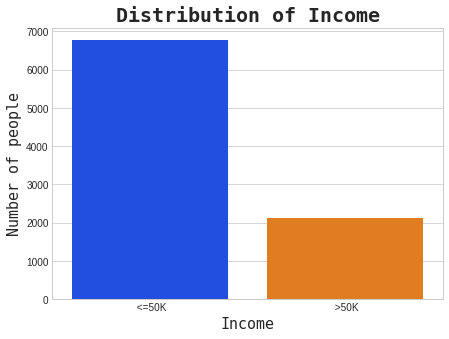

In [16]:
income = dataset['salary'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

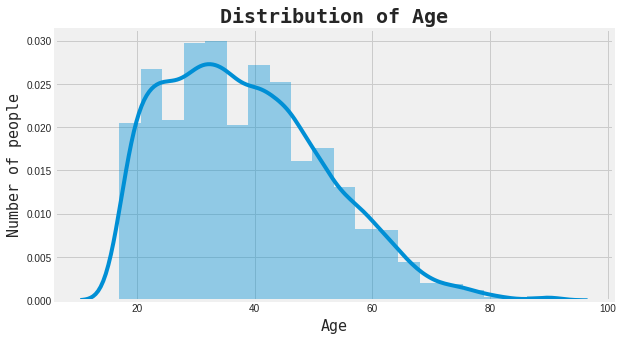

In [17]:
age = dataset['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(dataset['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

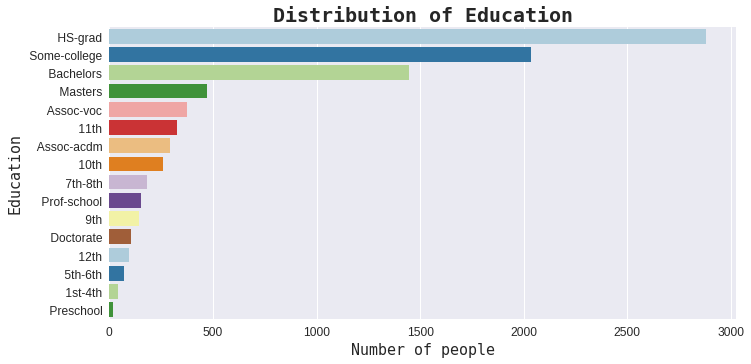

In [18]:
edu = dataset['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

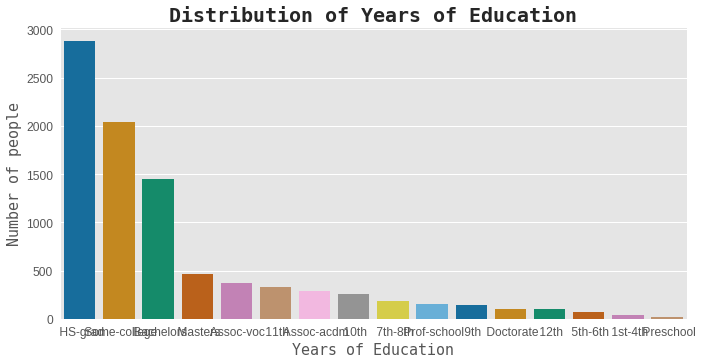

In [20]:
edu_num = dataset['education'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

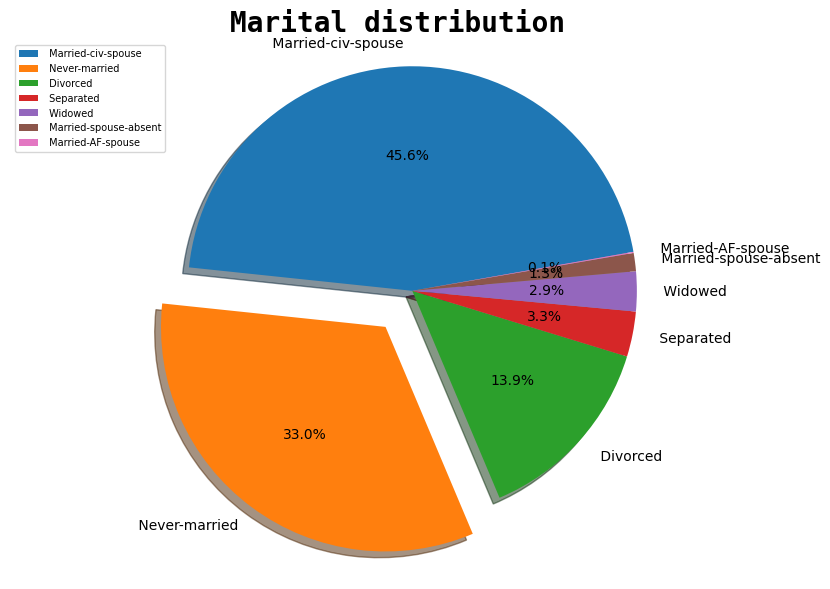

In [22]:
marital = dataset['marital-status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

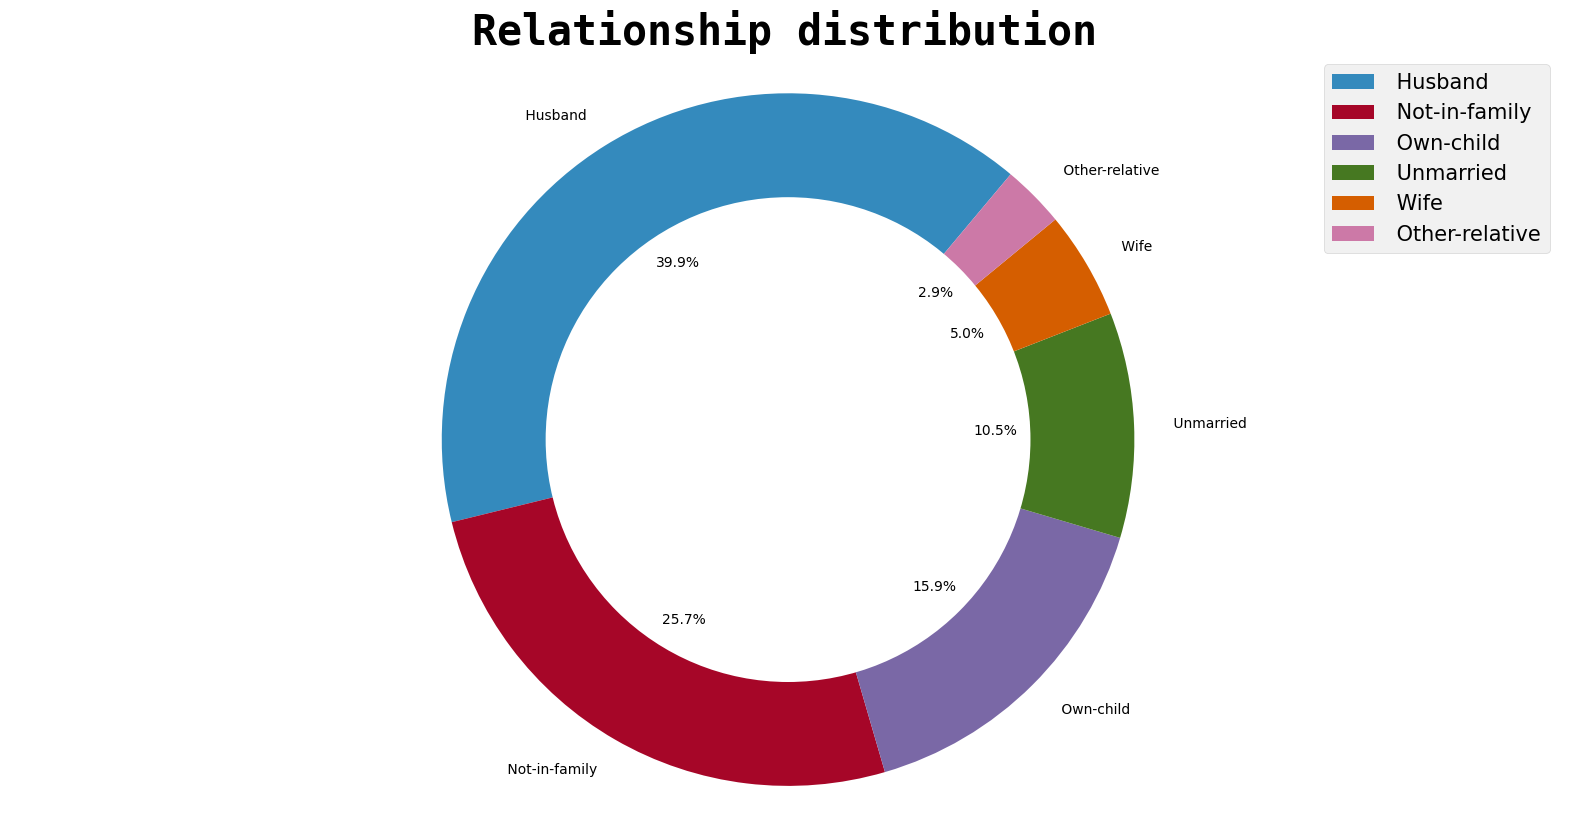

In [23]:
relation = dataset['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

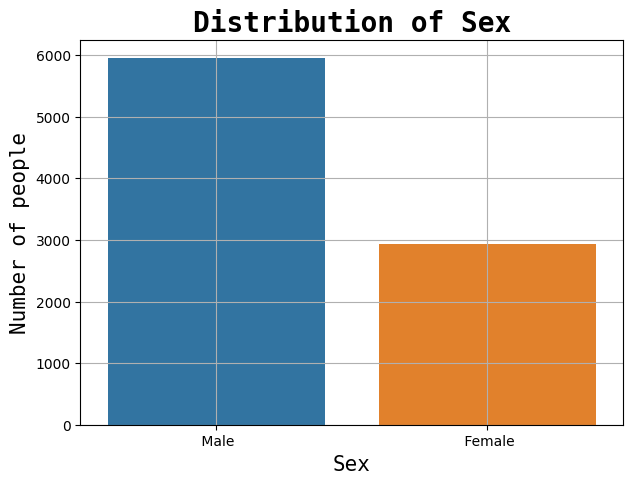

In [24]:
sex = dataset['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

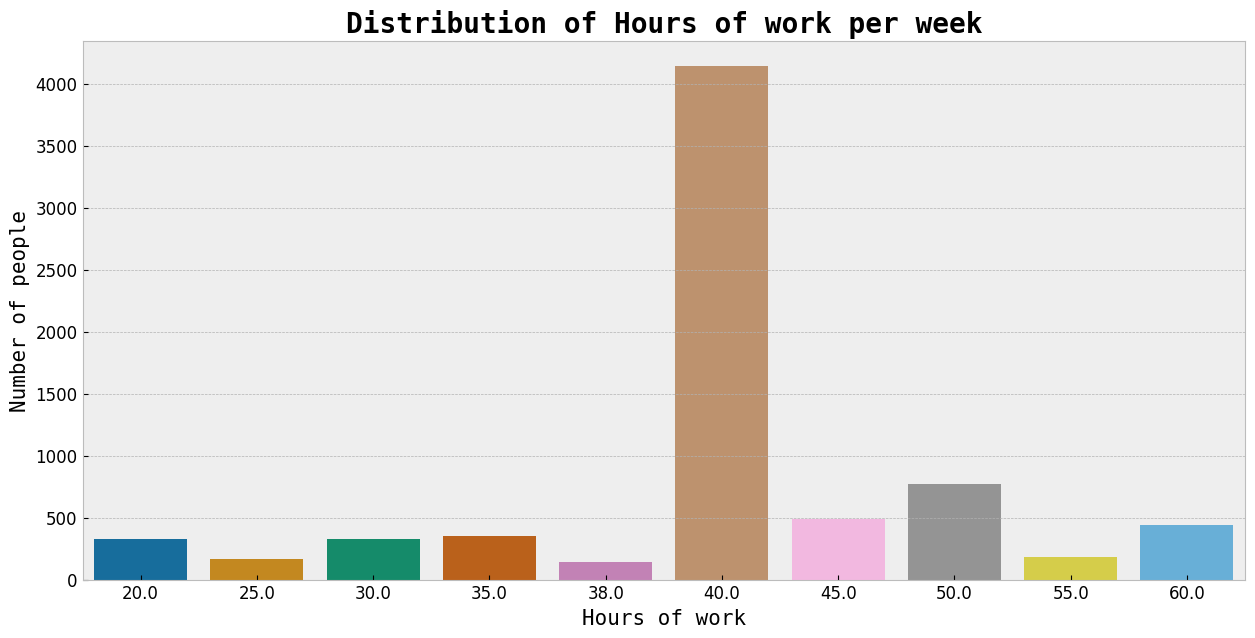

In [27]:
hours = dataset['hours-per-week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

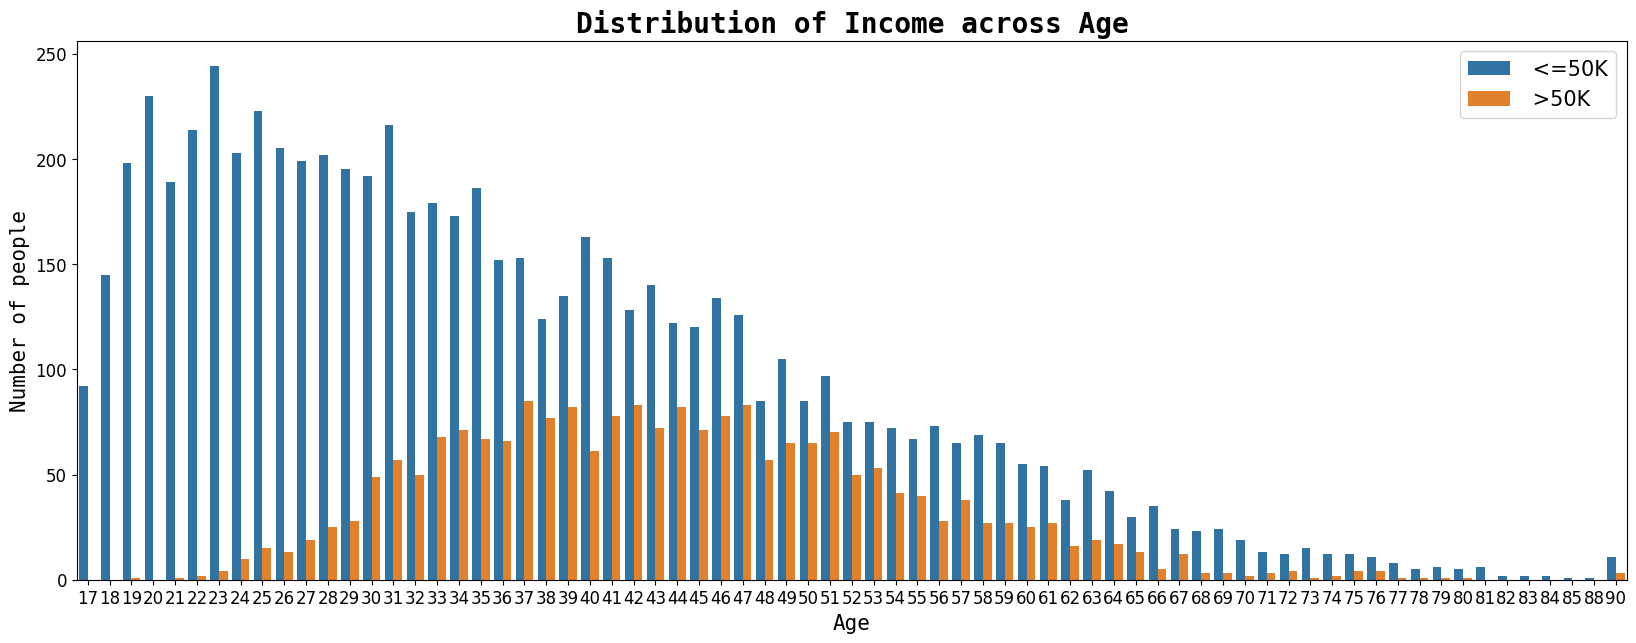

In [29]:
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['age'], hue=dataset['salary'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

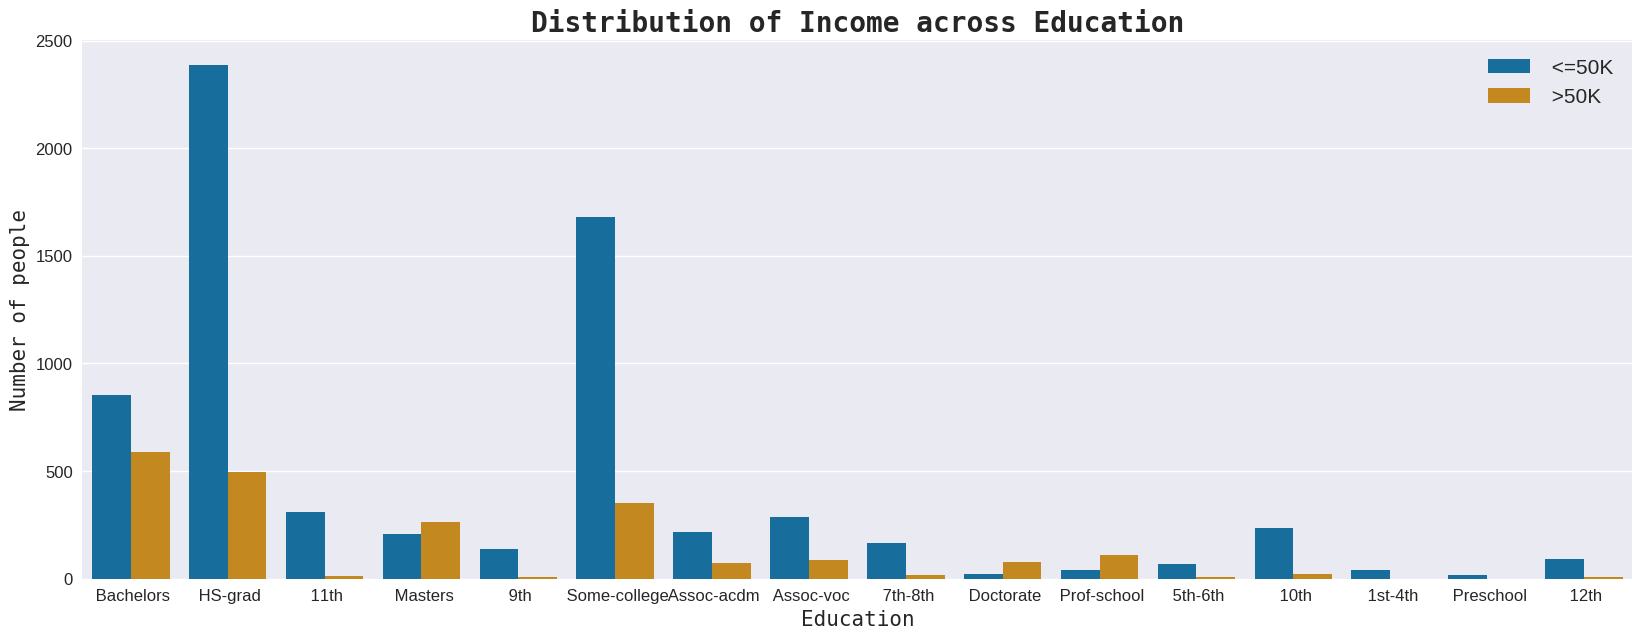

In [31]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['education'],
              hue=dataset['salary'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


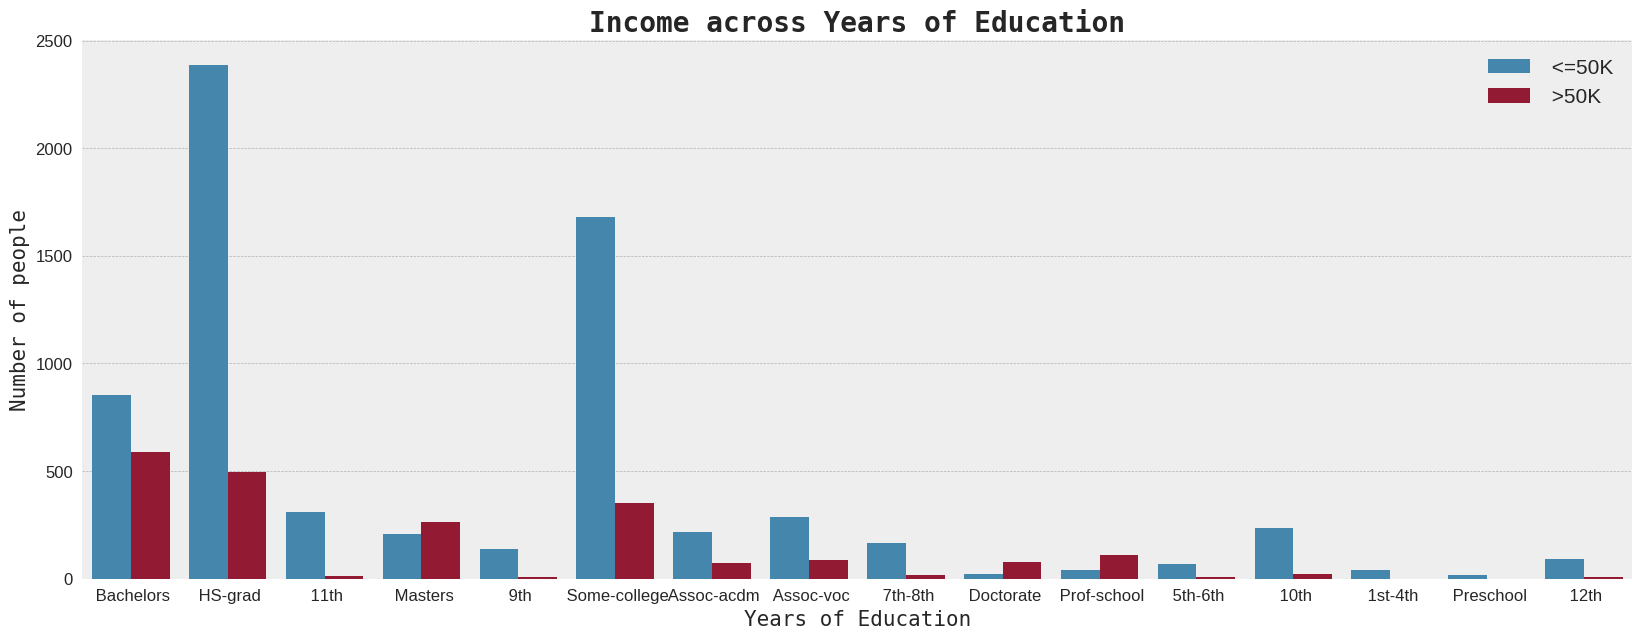

In [34]:
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['education'],
              hue=dataset['salary'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()


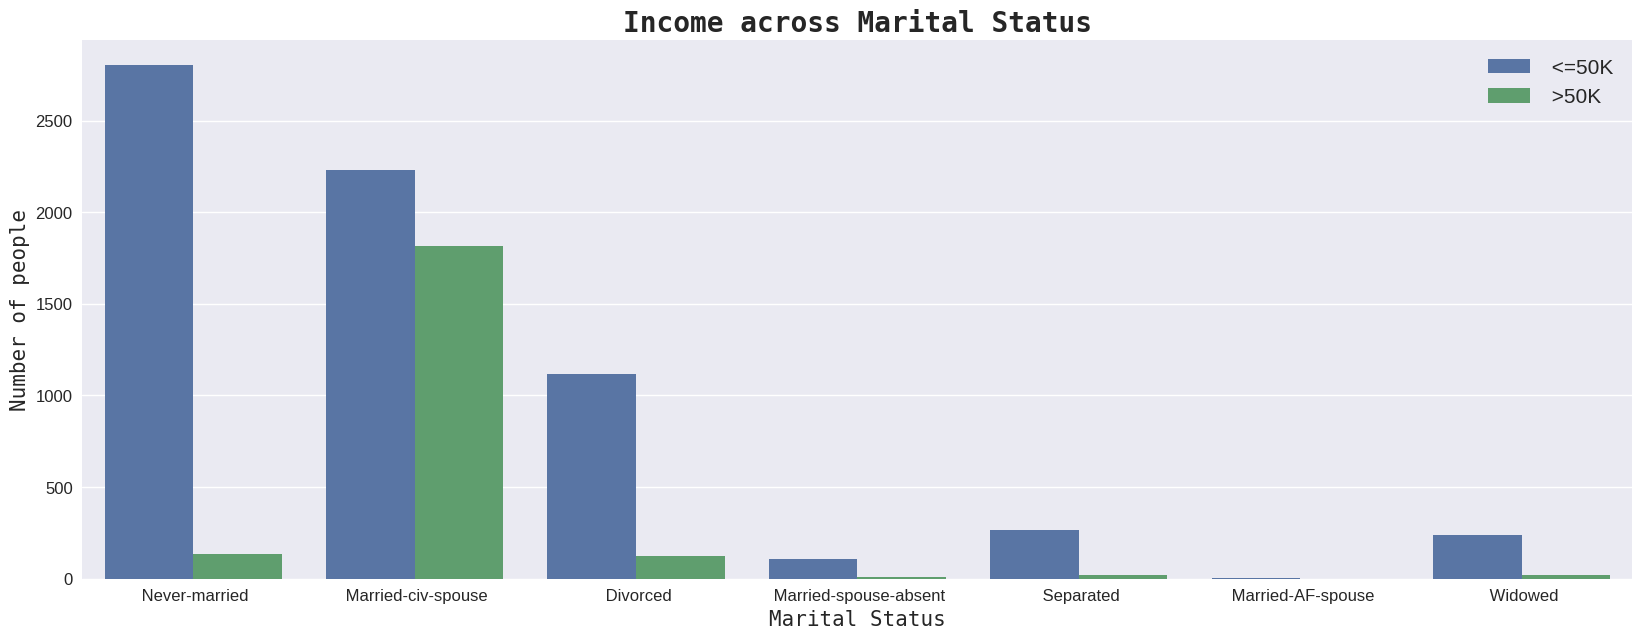

In [36]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['marital-status'], hue=dataset['salary'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

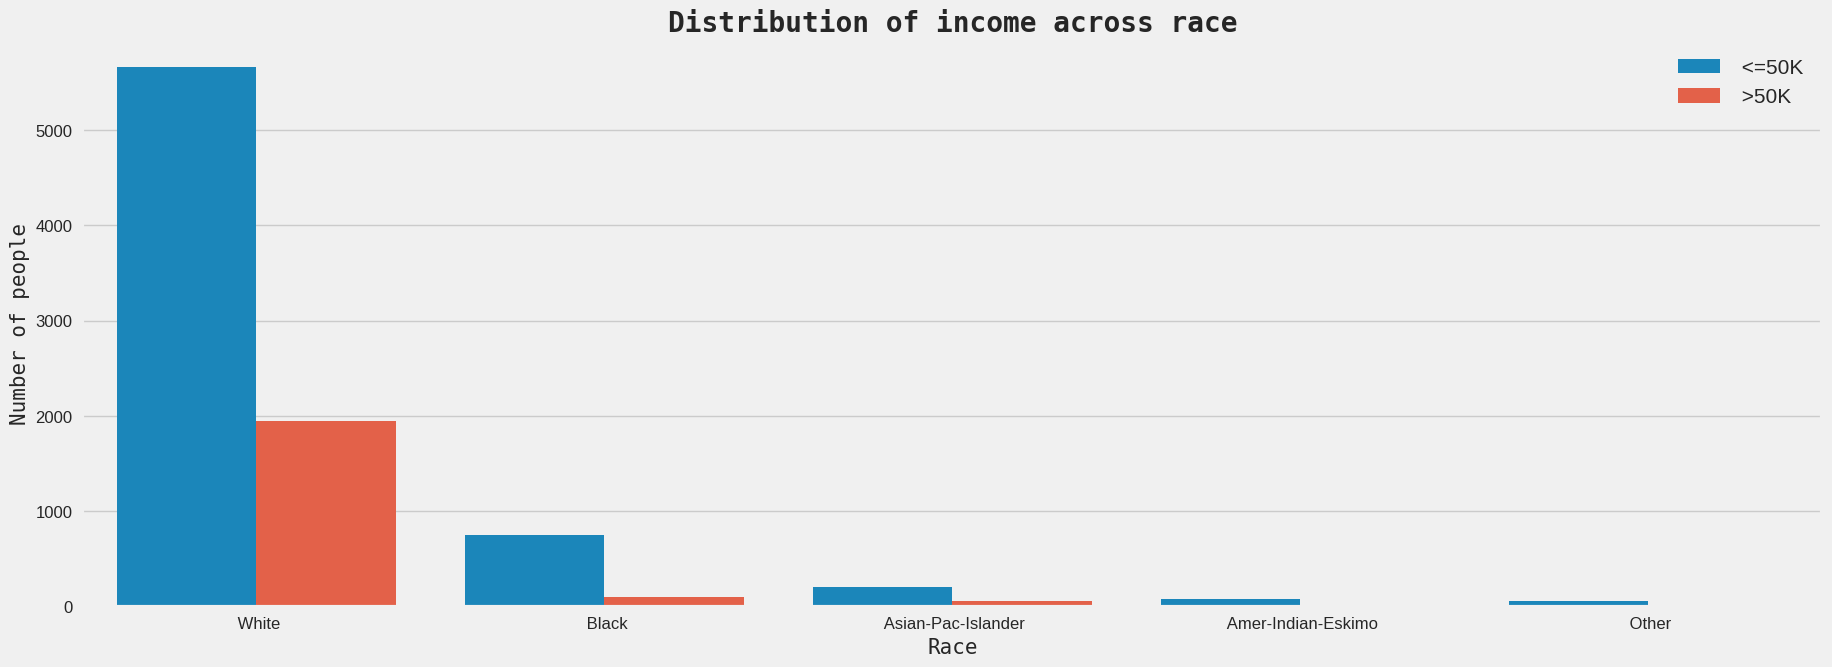

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['race'], hue=dataset['salary'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

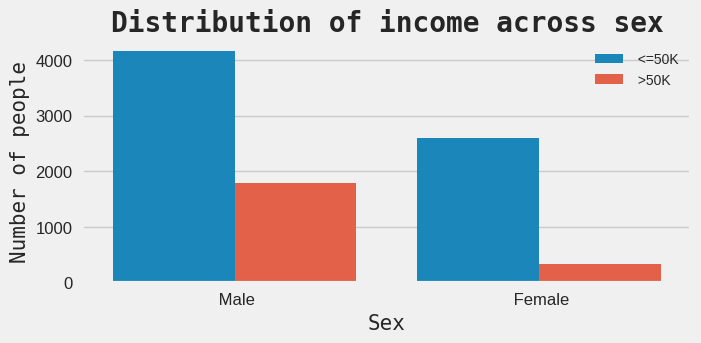

In [39]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(dataset['sex'], hue=dataset['salary'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
dataset['income'] = le.fit_transform(dataset['salary'])